In [3]:
import pandas as pd
import numpy as np

In [4]:
conferences = pd.read_csv("Conferences_with_keywords.csv")
conferences

,Title,Link,Type,Keywords
0,2025 PCI SSC North America Community Meeting,https://events.pcisecuritystandards.org/#,CyberSecurity,"pci ssc, payment security, security standards,..."
1,2025 PCI SSC Europe Community Meeting,https://events.pcisecuritystandards.org/#,CyberSecurity,"pci security standards council, payment securi..."
2,2025 PCI SSC Asia-Pacific Community Meeting,https://events.pcisecuritystandards.org/#,CyberSecurity,"pci security standards council, payment data, ..."
3,RSA Conference 2025,https://www.rsaconference.com/usa,CyberSecurity,"rsac conference, cybersecurity, conference age..."
4,Innovate Cybersecurity Summit,https://innovatecybersecuritysummit.com/,CyberSecurity,"cybersecurity, cybersecurity events, summits, ..."
...,...,...,...,...
232,Virginia HIMSS Annual Fall Conference,https://www.vahimss.org,Health Informatics,"himss, healthcare it, information security, da..."
233,GNUHealth Con,https://www.gnuhealthcon.org,Health Informatics,"gnu health, orthanc, international conference,..."
234,AIMed Global Summit,https://aimed.events,Health Informatics,"artificial intelligence (ai), medicine, ai in ..."
235,International Conference on Nursing and Health...,https://www.nursingconference.com,Health Informatics,"nursing conferences, healthcare, nursing care,..."


In [5]:
conferences.groupby("Type").size().reset_index(name="count")

,Type,count
0,AI-ML,192
1,CyberSecurity,25
2,Health Informatics,20


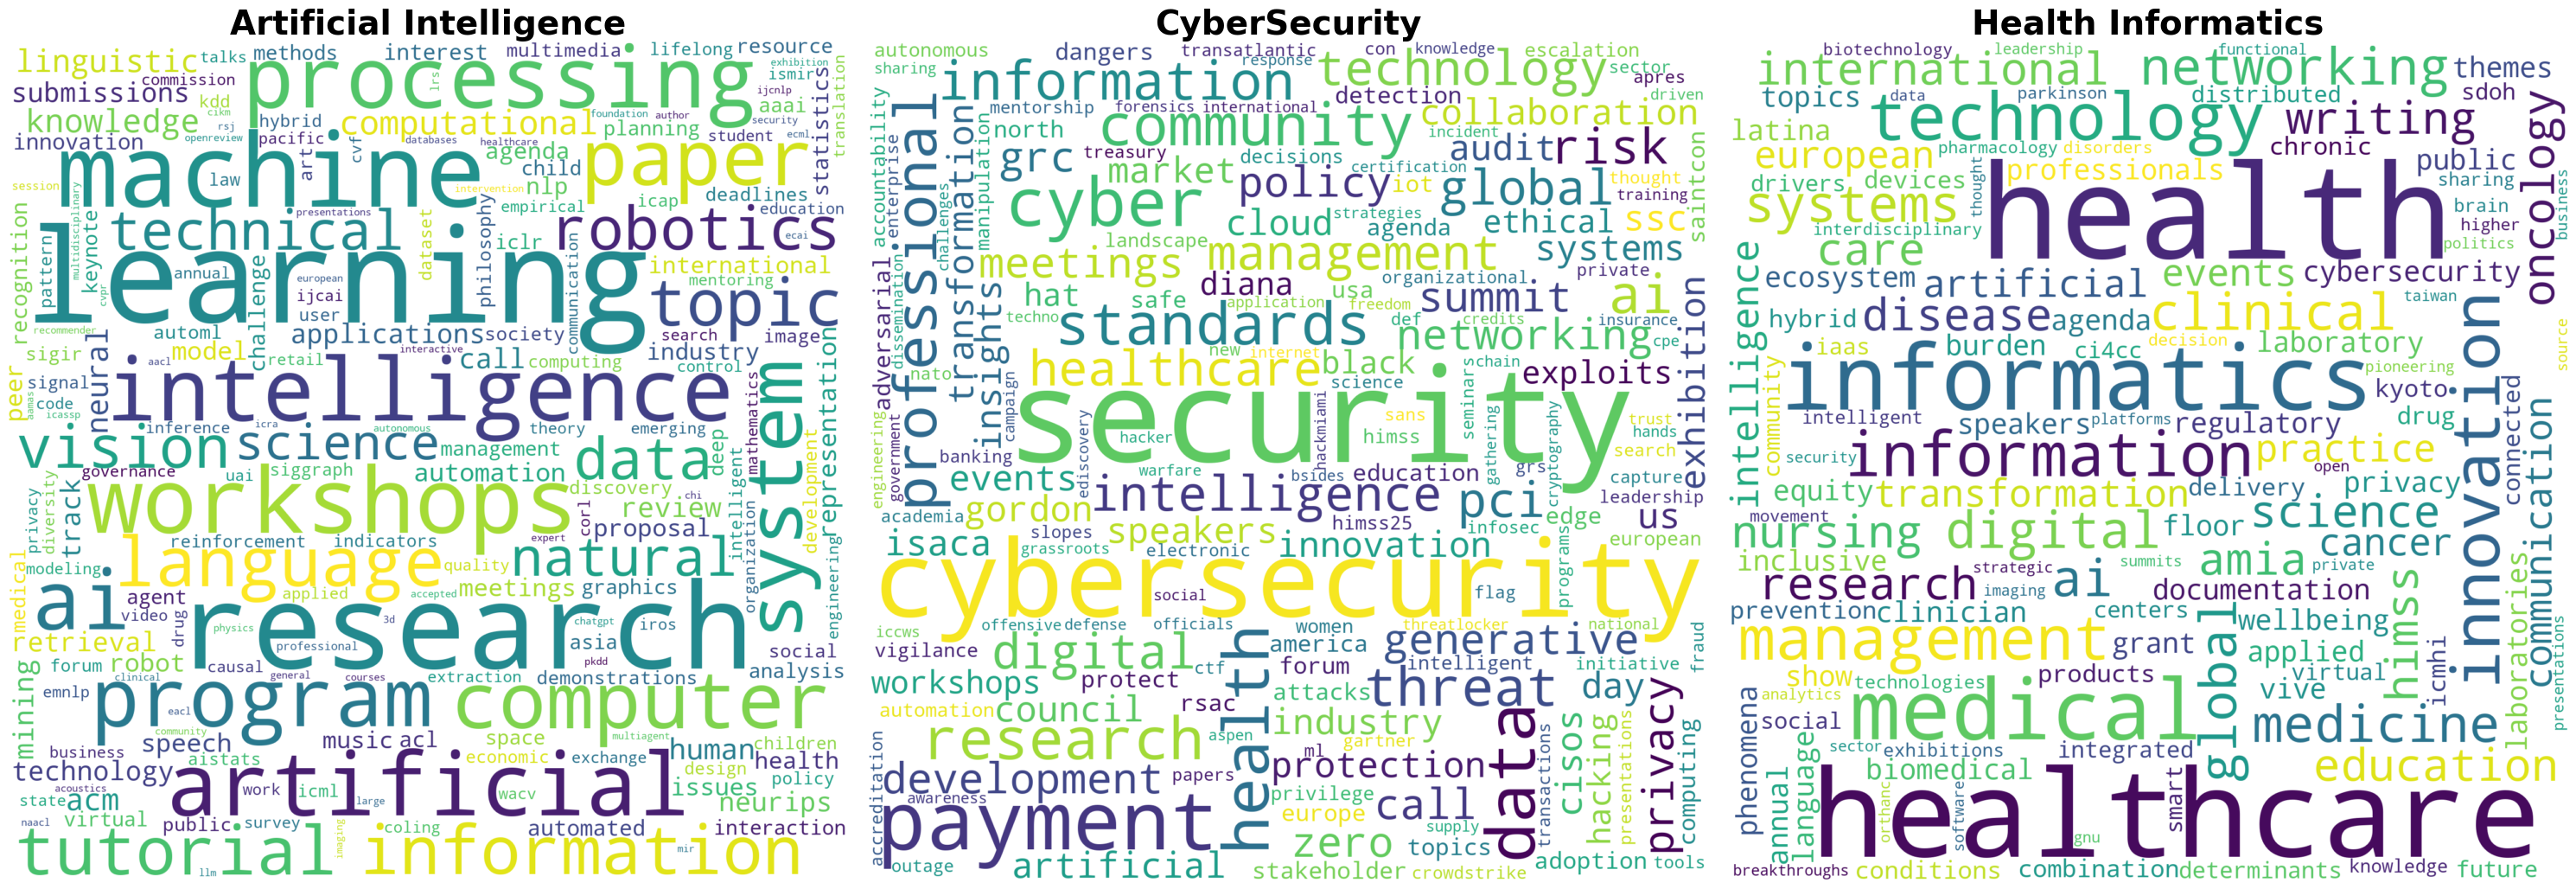

,Type,count
0,AI-ML,192
1,CyberSecurity,25
2,Health Informatics,20


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import os
import re


# --- Assuming your DataFrame is called `conferences` ---

# Define unwanted keywords to remove (case-insensitive)
remove_words = [
    "submission", "academic", "workshop", "ieee", "call for papers",
    "proceedings", "poster", "symposium", "abstract", "conference", "conferences", 
    "scientific", "presentation", "meeting", "event"
]

# Create a regex pattern to remove those words
pattern = r'\b(' + '|'.join(remove_words) + r')\b'

# ✅ Clean the 'Keywords' column
conferences["Clean_Keywords"] = (
    conferences["Keywords"]
    .astype(str)
    .apply(lambda x: re.sub(pattern, '', x, flags=re.IGNORECASE))
)

# ✅ Group text by Type after cleaning
grouped_text = (
    conferences.groupby("Type")["Clean_Keywords"]
    .apply(lambda x: " ".join(x))
    .to_dict()
)

# ✅ Define color maps for each type
colormaps = {
    "Artificial Intelligence": "viridis",
    "CyberSecurity": "viridis",
    "Health Informatics": "viridis"
}

# ✅ Make the figure and fonts bigger
types = list(grouped_text.keys())
fig, axes = plt.subplots(1, len(types), figsize=(10 * len(types), 10))  # Bigger figure

if len(types) == 1:
    axes = [axes]

for ax, type_name in zip(axes, types):
    # Handle renaming if your DataFrame still uses "AI-ML"
    if type_name == "AI-ML":
        type_name_display = "Artificial Intelligence"
    else:
        type_name_display = type_name

    text = grouped_text[type_name]
    wordcloud = WordCloud(
        width=1600,
        height=1600,
        max_font_size=250,
        background_color="white",
        colormap=colormaps.get(type_name_display, "Blues"),
        collocations=False,
    ).generate(text)

    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(type_name_display, fontsize=28, weight="bold")
    ax.axis("off")

plt.tight_layout()
plt.show()

conferences.groupby("Type").size().reset_index(name="count")

In [20]:
df = conferences

In [24]:
pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib_venn
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=033d15733c288d1d95e6a8dab5eac3506554ba49d755bda91aeefd620a2a423e
  Stored in directory: c:\users\gauur\appdata\local\pip\cache\wheels\c4\16\4a\93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built matplotlib_venn




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from collections import Counter
import re

In [34]:
from collections import Counter

# Function to clean and split keywords
def clean_keywords(keywords):
    # Convert to lowercase and split by commas, removing whitespace
    return [keyword.strip().lower() for keyword in keywords.split(',') if keyword.strip()]

# ✅ Define unwanted keywords to remove (case-insensitive)
remove_keywords = {
    'cybersecurity', 'healthcare', 'academic', 'himss', 'aistats', 'ai', 'presentations' , 'networking' , 'conference proceedings' , 'networking ' ,'academic research ' , 'academic'
    'workshops', 'conference', 'conferences', 'call for papers', '2024' , 'workshops' , 'exhibition' , 'europe', 'academic conferences' , 'art' , 'academic conference'
    'artificial intelligence', 'proceedings', 'submissions', 'call for speakers', 'international conference' , 'workshop' , 'agenda' , 'papers' , 'chi'
}

# Initialize keyword sets for each conference type
cybersecurity_keywords = set()
health_informatics_keywords = set()
ai_ml_keywords = set()

# ✅ Populate keyword sets while filtering unwanted ones
for _, row in df.iterrows():
    keywords = clean_keywords(str(row['Keywords']))
    # Remove any unwanted words
    filtered_keywords = [kw for kw in keywords if kw not in remove_keywords]

    if row['Type'] == 'CyberSecurity':
        cybersecurity_keywords.update(filtered_keywords)
    elif row['Type'] == 'Health Informatics':
        health_informatics_keywords.update(filtered_keywords)
    elif row['Type'] == 'AI-ML':
        ai_ml_keywords.update(filtered_keywords)

# ✅ Find common keywords between pairs
cyber_health = cybersecurity_keywords & health_informatics_keywords
cyber_ai = cybersecurity_keywords & ai_ml_keywords
health_ai = health_informatics_keywords & ai_ml_keywords
all_common = cybersecurity_keywords & health_informatics_keywords & ai_ml_keywords

# ✅ Find unique keywords for each type
cyber_unique = cybersecurity_keywords - health_informatics_keywords - ai_ml_keywords
health_unique = health_informatics_keywords - cybersecurity_keywords - ai_ml_keywords
ai_unique = ai_ml_keywords - cybersecurity_keywords - health_informatics_keywords

# Count keyword frequencies for display
def get_top_keywords(keyword_set, df, n=5):
    counter = Counter()
    for keyword in keyword_set:
        counter[keyword] = sum(keyword in str(row['Keywords']).lower() for _, row in df.iterrows())
    return [keyword for keyword, _ in counter.most_common(n)]

# ✅ Get top keywords for each section
top_cyber_unique = get_top_keywords(cyber_unique, df)
top_health_unique = get_top_keywords(health_unique, df)
top_ai_unique = get_top_keywords(ai_unique, df)
top_cyber_health = get_top_keywords(cyber_health, df)
top_cyber_ai = get_top_keywords(cyber_ai, df)
top_health_ai = get_top_keywords(health_ai, df)
top_all_common = get_top_keywords(all_common, df)

# ✅ Print clean results
print("Common Keywords (CyberSecurity & Health Informatics):", top_cyber_health)
print("Common Keywords (CyberSecurity & AI-ML):", top_cyber_ai)
print("Common Keywords (Health Informatics & AI-ML):", top_health_ai)
print("Common Keywords (All Three):", top_all_common)
print("Unique CyberSecurity Keywords:", top_cyber_unique)
print("Unique Health Informatics Keywords:", top_health_unique)
print("Unique AI-ML Keywords:", top_ai_unique)


Common Keywords (CyberSecurity & Health Informatics): ['artificial intelligence', 'privacy', 'digital health', 'information security', 'health it']
Common Keywords (CyberSecurity & AI-ML): ['artificial intelligence', 'data', 'academic research', 'privacy', 'professional development']
Common Keywords (Health Informatics & AI-ML): ['research', 'artificial intelligence', 'innovation', 'privacy', 'artificial intelligence (ai)']
Common Keywords (All Three): ['artificial intelligence', 'privacy']
Unique CyberSecurity Keywords: ['technology', 'ml', 'security conferences', 'community meetings', 'health conference']
Unique Health Informatics Keywords: ['science', 'healthcare information', 'health informatics', 'global health', 'management systems']
Unique AI-ML Keywords: ['search', 'machine learning', 'academic conference', 'systems', 'health']
